In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')


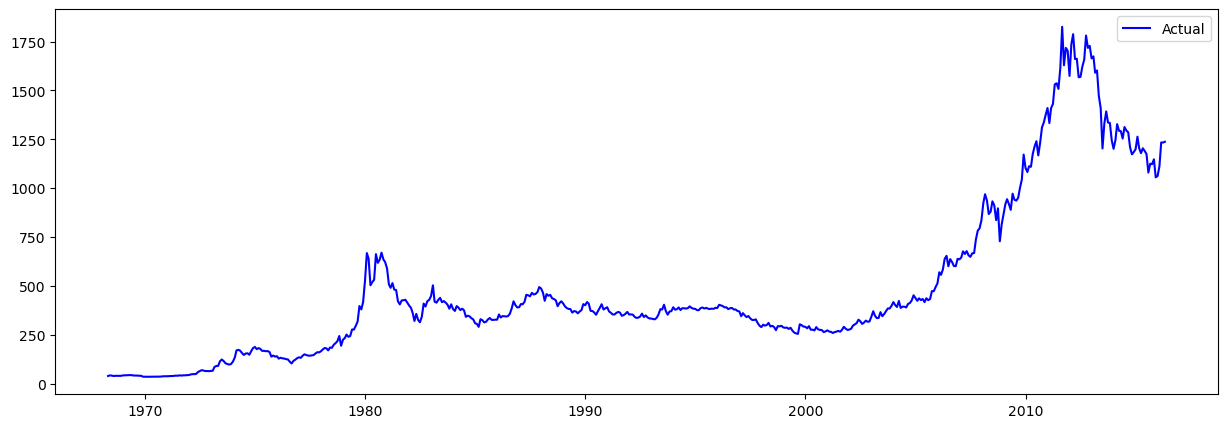

In [16]:
back_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\BUNDESBANK-BBK01_WT5511.csv', index_col=0) 
back_df.index = pd.to_datetime(back_df.index, errors='coerce')

plt.figure(figsize=(15,5))
plt.plot(back_df.index, back_df['Value'], color='blue', label='Actual') 
plt.legend()
plt.show()

In [17]:
y = back_df['Value']

y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((565,), (12,))

In [18]:
from pmdarima.arima import auto_arima

In [19]:
def arima_with_plot(model):
    
    y_pred = model.predict(n_periods=len(y_test))

    # Calculate RMSE
    error = root_mean_squared_error(y_test, y_pred)
    print("RMSE: ", error)

    y_pred.index = y_test.index

    plt.figure(figsize=(15, 5))
    plt.plot(y_train, label='Train')
    plt.plot(y_test, label='Test')
    plt.plot(y_pred, label='Prediction')
    plt.text(1975, 850,f'RMSE: {error:.2f}', fontsize=8)
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5622.164, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5618.047, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5617.332, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5622.101, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5618.606, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5618.188, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5617.812, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.952 seconds
RMSE:  91.10508106510662


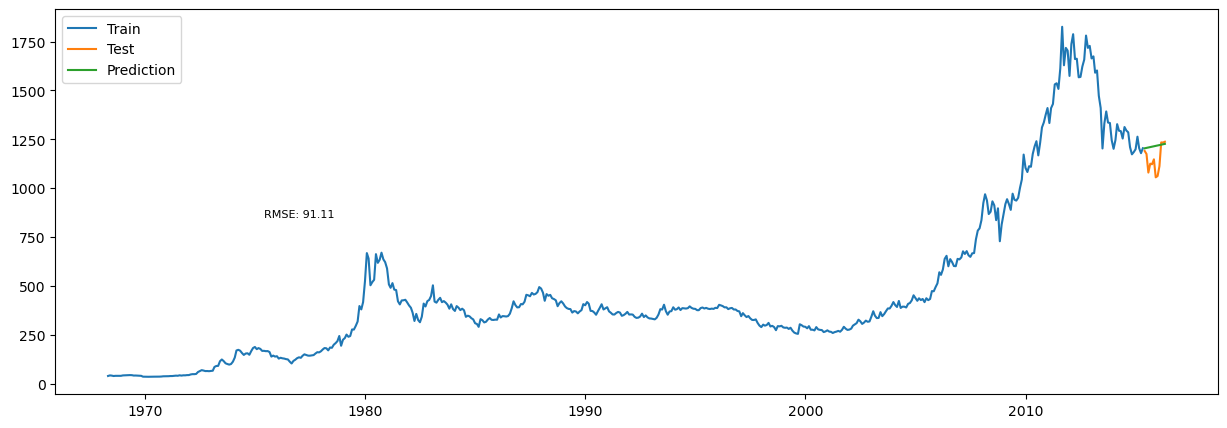

In [ ]:
# Without seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True) 
arima_with_plot(model)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5615.321, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5622.164, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5619.560, Time=0.52 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5618.957, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5622.101, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5613.419, Time=2.73 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=5611.792, Time=5.71 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=5617.378, Time=6.46 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=3.42 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=5622.630, Time=3.31 sec
 ARIMA(3,1,2)(0,0,2)[12] intercept   : AIC=5626.629, Time=3.87 sec
 ARIMA(2,1,3)(0,0,2)[12] intercept   : AIC=5626.630, Time=4.79 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=5621.194, Time=2.45 sec
 ARIMA(1,1,3)(0,0,2)[12] inte

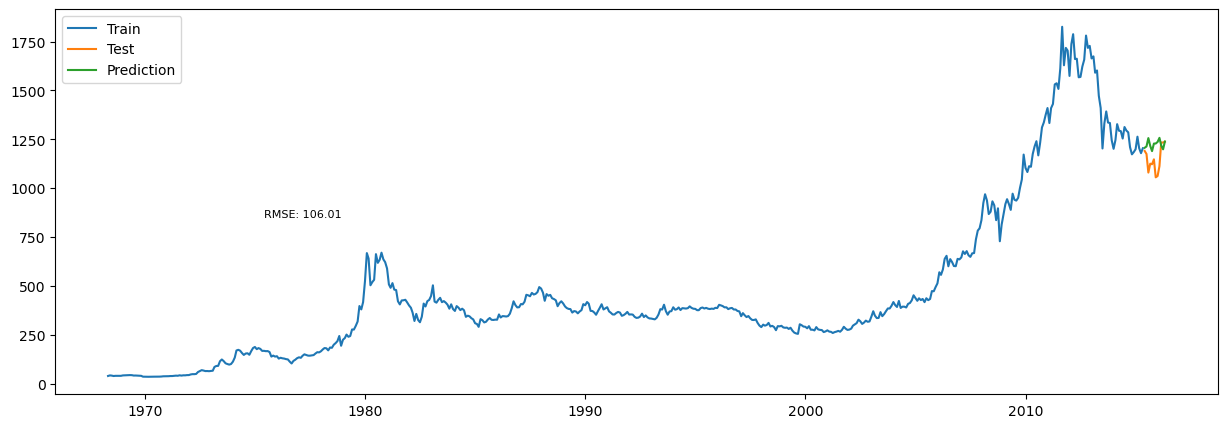

In [ ]:
# With seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12) 
arima_with_plot(model)